<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1>

<p>O presente projeto busca utilizar um <i>dataset</i> composto de 12 variáveis descritoras das condições físicas de indivíduos e suas classificações acerca de dores normais ou anormais e treinar uma rede MLP (Multi Layer Perceptron) para classificar novos casos que não haviam sido vistos antes</p>

Grupo: Caio Fernandes, Carlos Mendes, Matheus Lafayette, Thiago Alves e Roberto Albuquerque

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias, sendo elas:
- <b>Numpy</b>: Operações matemáticas;
- <b>Pandas</b>: Manipulação de datasets;
- <b>Sklearn</b>: Modelos de machine learning;
- <b>Seaborn/Matplotlib</b>: Plotagem de gráficos.

In [11]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [12]:
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Visualizando a distribuição dos dados no dataset:

In [13]:
df['Class_att'].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

Podemos ver um desbalanceamento entre as classes, sendo a classe Abnormal a mais frequente.

Como a coluna 'Unnamed:13' contém descrições de cada classe, que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [14]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [15]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

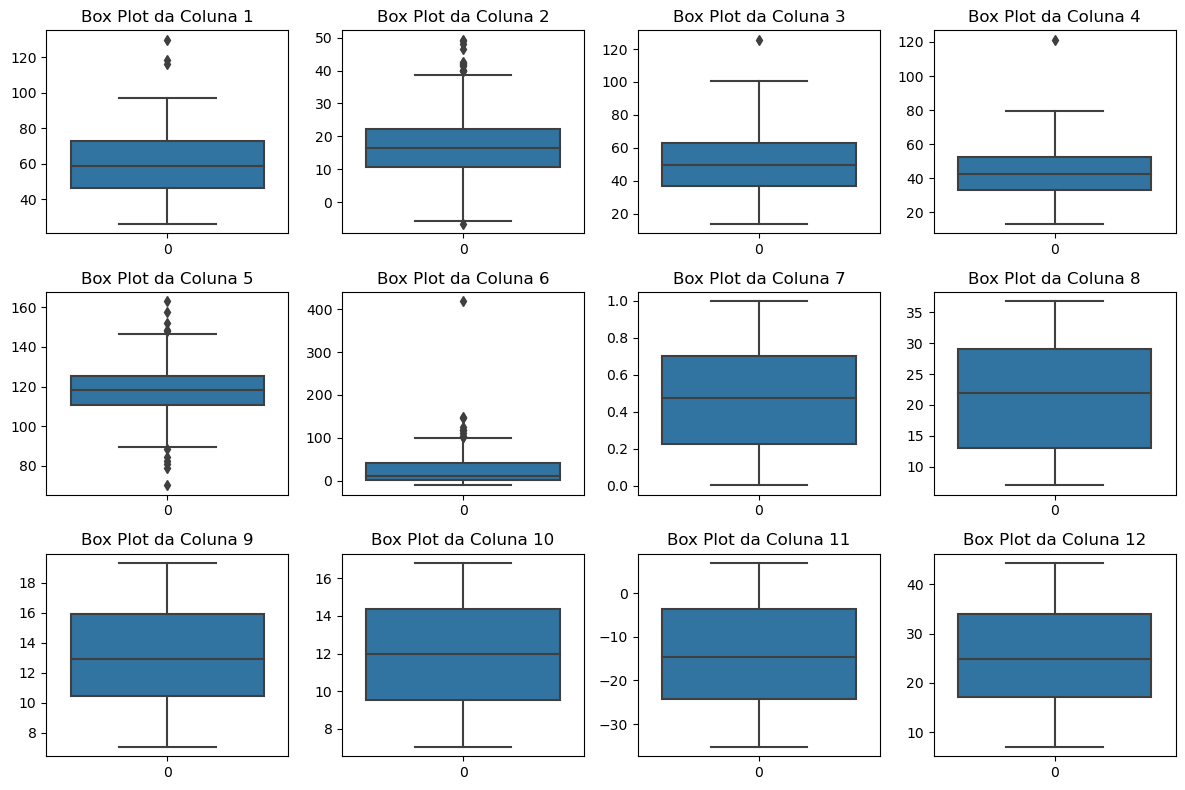

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(12, 8))

for col in range(1, 13):
    row = (col - 1) // 4 
    col_idx = (col - 1) % 4  
    ax = axes[row, col_idx] 

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

plt.tight_layout()

plt.show()

Como é possível visualizar em cada um dos gráficos acima, algumas colunas possuem outliers, representados pelos pontos escuros no boxplot. Nas próximas sessões, será feita uma análise sobere a relevância desses dados na qualidade do treino da MLP.


# Primeiro Treino 💪

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [18]:
def evaluateModel(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print()
  print(f"score = {model.score(X_test, y_test):.2f}\n")
  print("classification report:")
  print(classification_report(y_test, y_pred))
  print("confusion matrix:")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.show()

In [19]:
def plot_scores(labels, scores, str):
  normalized_scores = [(score - min(scores)) / (max(scores) - min(scores)) for score in scores]
  color_palette = sns.color_palette("cool", len(activation_funcs))

  sns.barplot(x=labels, y=scores, palette=color_palette)
  plt.xlabel(str)
  plt.ylabel("Score")
  plt.title(f"{str} X Score")
  plt.ylim(min(scores) - 0.05, min(max(scores) + 0.05, 1))
  plt.xticks(rotation=45)
  plt.show()

In [20]:
model = MLPClassifier(verbose=True, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [21]:
model.fit(X_train, y_train)

Iteration 1, loss = 8.83975992
Iteration 2, loss = 4.38450822
Iteration 3, loss = 1.56396573
Iteration 4, loss = 1.38818416
Iteration 5, loss = 2.08664603
Iteration 6, loss = 2.36014838
Iteration 7, loss = 2.20556447
Iteration 8, loss = 1.76020775
Iteration 9, loss = 1.26138644
Iteration 10, loss = 0.89506850
Iteration 11, loss = 0.86885987
Iteration 12, loss = 1.03712192
Iteration 13, loss = 1.14691070
Iteration 14, loss = 1.06321017
Iteration 15, loss = 0.88211266
Iteration 16, loss = 0.74778332
Iteration 17, loss = 0.72793526
Iteration 18, loss = 0.75909171
Iteration 19, loss = 0.78670973
Iteration 20, loss = 0.76693524
Iteration 21, loss = 0.69623432
Iteration 22, loss = 0.64040940
Iteration 23, loss = 0.63908392
Iteration 24, loss = 0.66096255
Iteration 25, loss = 0.66859654
Iteration 26, loss = 0.64873007
Iteration 27, loss = 0.61348615
Iteration 28, loss = 0.58842477
Iteration 29, loss = 0.57427613
Iteration 30, loss = 0.57838678
Iteration 31, loss = 0.57375548
Iteration 32, los

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)

Como mostrado pelo output da célula acima, o treino realizado não chegou à convergência, mas foi encerrado devido ao número máximo de iterações, o qual foi atingido. Com isso, uma possível alteração a ser feita é a quantidade máxima de iterações do modelo.


score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62

confusion matrix:


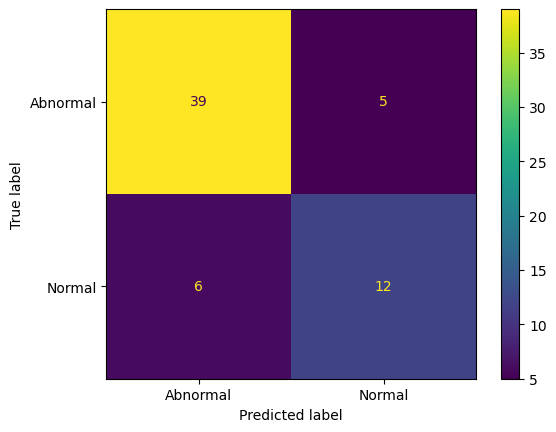

In [22]:
evaluateModel(model, X_test, y_test)

In [23]:
y_train.value_counts()

Abnormal    166
Normal       82
Name: Class_att, dtype: int64

Como é possível perceber pelo <i>classification report</i>, temos uma facilidade maior do modelo em classificar corretamente a classe de <i>'abnormal'</i>. De fato, ao observar a distribuição dos valores no dataset de treino feita acima, é possível reparar que temos mais ocorrências dessa classe, do que da classe 'normal'. É necessário, então, fazer o balanceamento das classes no dataset de treino

# Balanceamento de classes no dataset de treino ⚖️

Vamos utilizar a técnica de SMOTE para que a quantidade de exemplos de cada classe sejam iguais. Para isso, vamos utilizar a biblioteca imblearn, que possui a implementação dessa técnica.

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
y_train_resampled.value_counts()

Abnormal    166
Normal      166
Name: Class_att, dtype: int64

Como podemos ver, agora as classes estão balanceadas

In [26]:
model = MLPClassifier(verbose=False, max_iter=200, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [27]:
model.fit(X_train_resampled, y_train_resampled)

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)


score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62

confusion matrix:


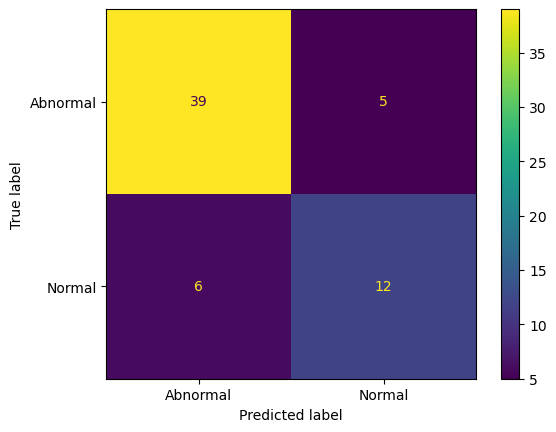

In [28]:
evaluateModel(model, X_test, y_test)

In [29]:
from scipy import stats
outliers_removed = df[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
outliers_removed.shape

(298, 13)

In [30]:
y = outliers_removed['Class_att']
X = outliers_removed.drop(['Class_att'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
model = MLPClassifier(verbose=False, max_iter=200, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
model.fit(X_train_resampled, y_train_resampled)

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.87      0.91        46
      Normal       0.67      0.86      0.75        14

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.89      0.87      0.87        60

confusion matrix:


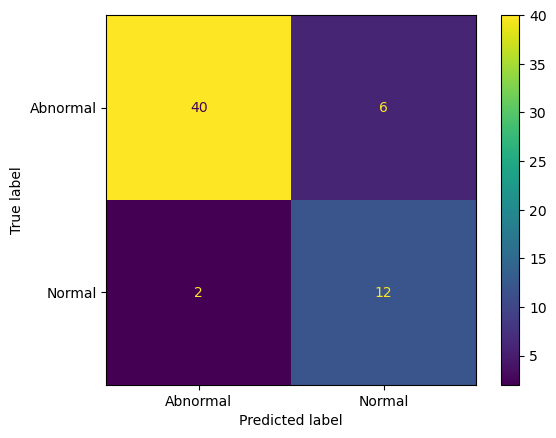

In [32]:
evaluateModel(model, X_test, y_test)

In [33]:
X_train, y_train = X_train_resampled, y_train_resampled

Com base nos resultados obtidos anteriormente, é possível notar que o modelo apresenta uma ligeira melhoria de performance quando treinado com o dataset sem <i>outliers</i> (para uma mesma configuração de rede). Vamos agora investigar como diferentes configurações hiperparâmetros de rede podem afetar a performance do modelo.

# Mudando as funções de ativação 📈

In [34]:
activation_funcs = ['relu', 'tanh', 'logistic', 'identity']
scores = []

for activation_func in activation_funcs:
  model = MLPClassifier(verbose=False, random_state=42, activation=activation_func, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


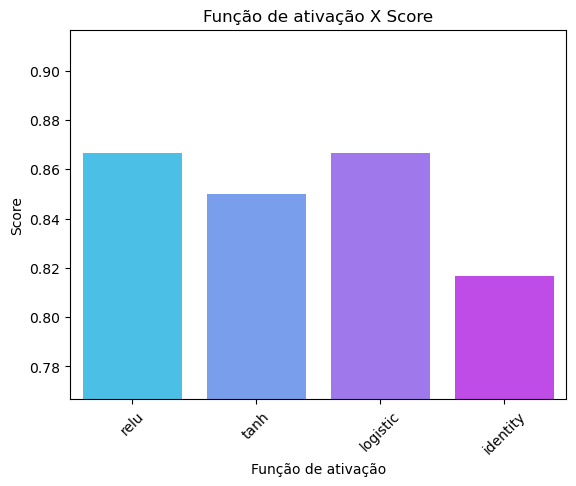

In [35]:
plot_scores(activation_funcs, scores, "Função de ativação")

In [36]:
model = MLPClassifier(verbose=False, random_state=42, activation='logistic', max_iter=1000)
model.fit(X_train, y_train);

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.93      0.89      0.91        46
      Normal       0.69      0.79      0.73        14

    accuracy                           0.87        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.87      0.87      0.87        60

confusion matrix:


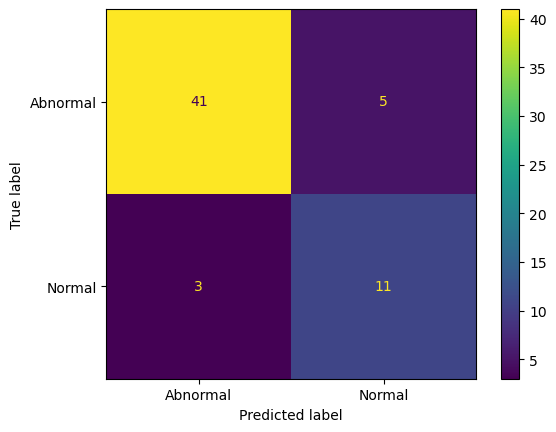

In [37]:
evaluateModel(model, X_test, y_test)

# Trocando os solvers 🔨

In [38]:
solvers = ['lbfgs', 'adam', 'sgd']
scores = []

for solver in solvers:
  model = MLPClassifier(verbose=False, random_state=42, solver=solver, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

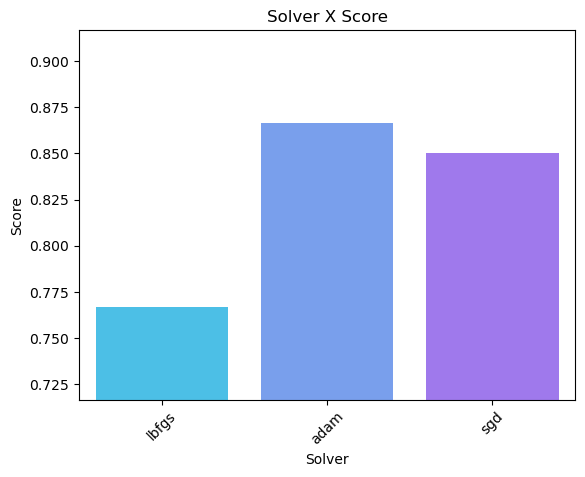

In [39]:
plot_scores(solvers, scores, "Solver")

In [40]:
model = MLPClassifier(verbose=False, random_state=42, solver='adam', max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.97      0.85      0.91        46
      Normal       0.65      0.93      0.76        14

    accuracy                           0.87        60
   macro avg       0.81      0.89      0.84        60
weighted avg       0.90      0.87      0.87        60

confusion matrix:


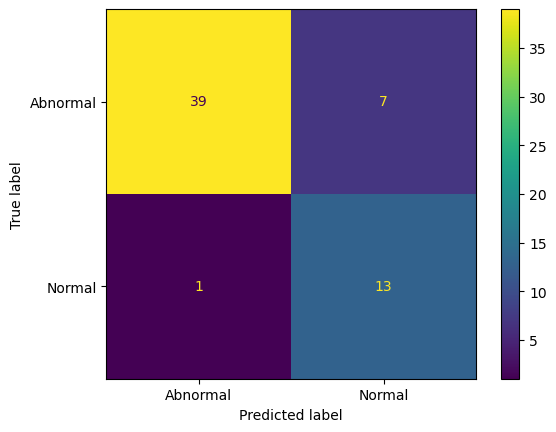

In [41]:
evaluateModel(model, X_test, y_test)

# Trocando learning rate 👨‍🏫

In [42]:
learning_rates = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
labels = ["1", "0.1", "0.01", "0.001", "0.0001", "0.00001", "0.000001"]
scores = []

for learning_rate in learning_rates:
  model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=learning_rate, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cadu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


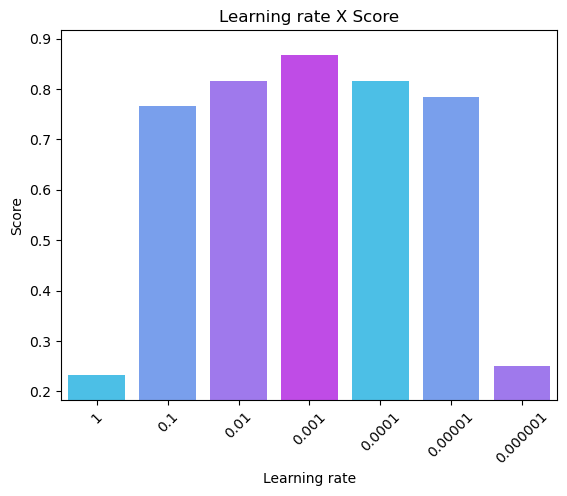

In [43]:
plot_scores(labels, scores, "Learning rate")

In [44]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1e-3, max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.97      0.85      0.91        46
      Normal       0.65      0.93      0.76        14

    accuracy                           0.87        60
   macro avg       0.81      0.89      0.84        60
weighted avg       0.90      0.87      0.87        60

confusion matrix:


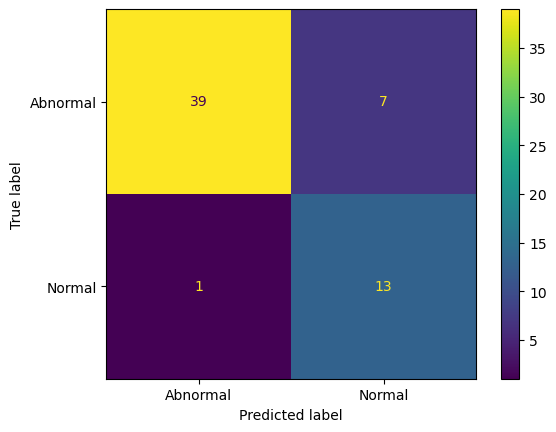

In [45]:
evaluateModel(model, X_test, y_test)

# Mudando hidden layers 🧅

In [46]:
hidden_layers_sizes = [(100, 100, 100), (512, 512, 512), (1024, 1024, 1024), (100, 100, 100, 100, 100), (512, 512, 512, 512, 512), (1024, 1024, 1024, 1024, 1024), (2048, 2048, 2048), (1024, 512, 128, 512, 1024), (16, 32, 64, 128, 256), (256, 64, 32, 16)]
labels = ["3x100", "3x512", "3x1024", "5x100", "5x512", "5x1024", "3x2048", "down-up", "up", "down"]
scores = []

for hidden_layer_sizes in tqdm(hidden_layers_sizes):
  model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [01:51<00:00, 11.14s/it]


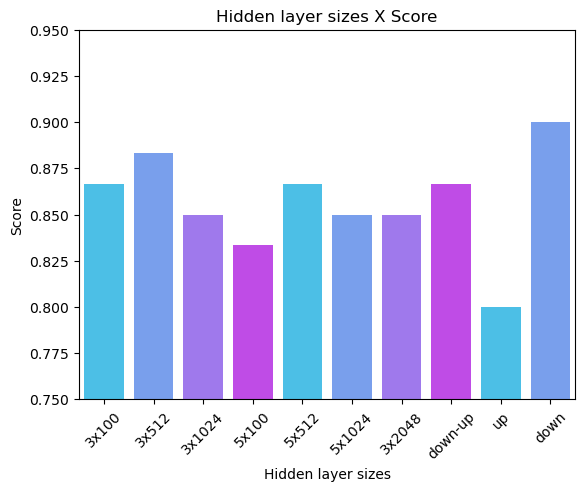

In [47]:
plot_scores(labels, scores, "Hidden layer sizes")

In [48]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (256, 64, 32, 16), max_iter=1000)
model.fit(X_train, y_train);


score = 0.90

classification report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.91      0.93        46
      Normal       0.75      0.86      0.80        14

    accuracy                           0.90        60
   macro avg       0.85      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60

confusion matrix:


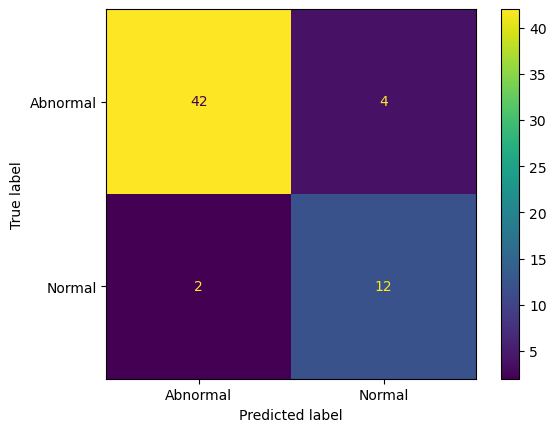

In [49]:
evaluateModel(model, X_test, y_test)

# Conclusão ✅

Ao observar os <i>scores</i> obtidos nas sessões anteriores para cada uma das mudanças, é possível notar que a melhor configuração de rede foi a que utilizou a função de ativação <i>logistic</i>, o <i>solver</i> <i>adam</i>, a taxa de aprendizado <i>0.001</i> e 4 camadas escondidas com 256, 64, 32 e 16 neurônios cada. Essa configuração obteve um <i>score</i> de 0.9, o que é um valor considerável para o problema em questão.